# Data decription:
## Introduction:
- Wave energy is a rapidly advancing and promising renewable energy source that holds great potential for addressing the challenges of global warming and climate change. However, optimizing energy output in large wave farms presents a complex problem due to the expensive calculations required to account for hydrodynamic interactions between wave energy converters (WECs). Developing a fast and accurate surrogate model is crucial to overcome these challenges. In light of this, we have compiled an extensive WEC dataset that includes 54,000 and 9,600 configurations involving 49 and 100 WECs, coordination, power, q-factor, and total farm power output. The dataset was derived from a study published at the GECCO conference and received the prestigious Best Paper award. We want to acknowledge the support of the University of Adelaide Phoenix HPC service in conducting this research.
### Info about data:
- No missing values
- No data preprocessing done previously
- No data that can be considered sensitive


# Exploratory data analysis:

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Now you can use sns for statistical data visualization

# Now you can use plt for plotting
# Load the CSV file
df = pd.read_csv('WEC_Perth_49.csv')

# Display the first few rows of the dataframe
print(df.head())


      X1    Y1      X2     Y2      X3     Y3      X4      Y4     X5   Y5  ...  \
0  600.0   0.0  546.16  37.50  489.79  74.88  432.47  112.05  650.0  0.0  ...   
1  593.0  12.0  546.16  37.50  489.79  74.88  432.47  112.05  644.0  8.0  ...   
2  593.0  12.0  546.16  37.50  489.79  74.88  432.47  112.05  644.0  8.0  ...   
3  593.0  12.0  546.16  37.50  489.79  74.88  432.47  112.05  644.0  8.0  ...   
4  200.0   0.0  146.17  37.53   89.76  74.93   32.40  112.18  400.0  0.0  ...   

    Power42   Power43    Power44   Power45    Power46    Power47   Power48  \
0  88867.92  98844.30  101283.59  98934.63  101624.58  100915.03  99625.68   
1  88896.55  98759.79  101346.07  98873.59  101629.01  100934.53  99606.13   
2  88919.83  98746.68  101346.15  98875.57  101618.32  100941.00  99611.35   
3  88855.14  98760.96  101338.59  98971.58  101632.28  100943.59  99589.25   
4  88005.30  98630.24  100432.73  98803.01  101064.48  100948.38  99028.87   

    Power49    qW  Total_Power  
0  96704.34

In [69]:
# Get a concise summary of the dataframe
print(df.info())

# Get descriptive statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 41.0 MB
None


                 X1            Y1            X2            Y2            X3  \
count  36043.000000  36043.000000  36043.000000  36043.000000  36043.000000   
mean     366.597060     18.709550    426.314033     51.085762    477.295590   
std      307.911246     44.043295    265.781316     90.151852    270.322011   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       65.770000      0.000000    200.000000      0.000000    289.950000   
50%      250.000000      0.000000    346.090000     37.520000    400.000000   
75%      600.000000      0.000000    745.980000     37.900000    689.800000   
max     1000.000000    885.590000   1000.000000    939.260000   1000.000000   

                 Y3            X4            Y4            X5            Y5  \
count  36043.000000  36043.000000  36043.000000  36043.000000  36043.000000   
mean      57.846020    497.150488     73.323178    684.309548     44.012247   
std       42.143917    279.631344     51.140816    

## Correlation Matrix

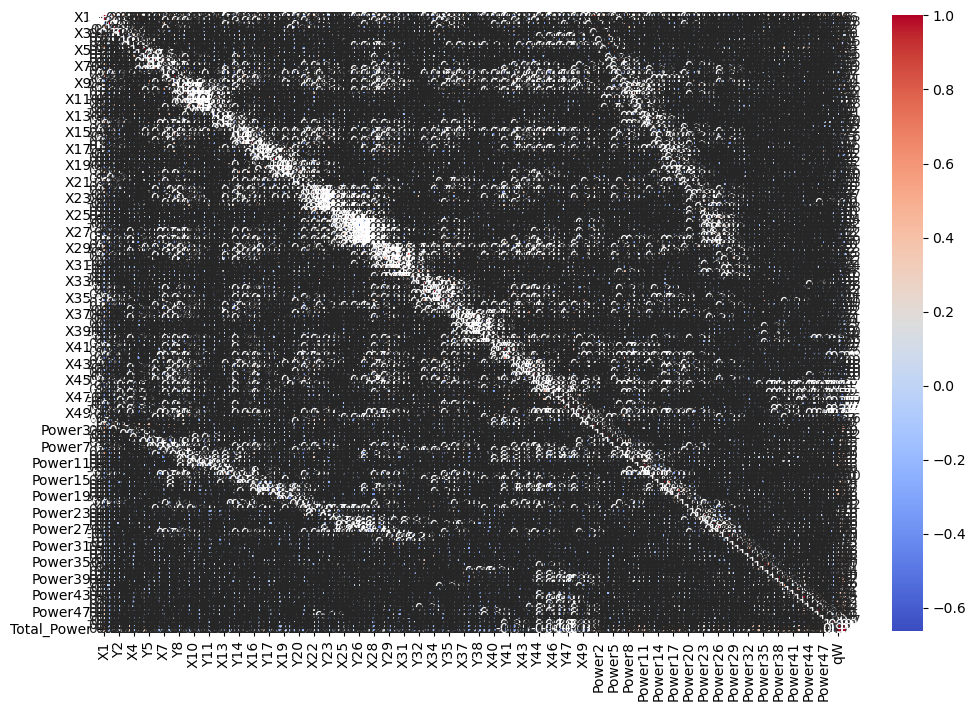

In [70]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


## Scatter plot

c:\Users\alaed\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


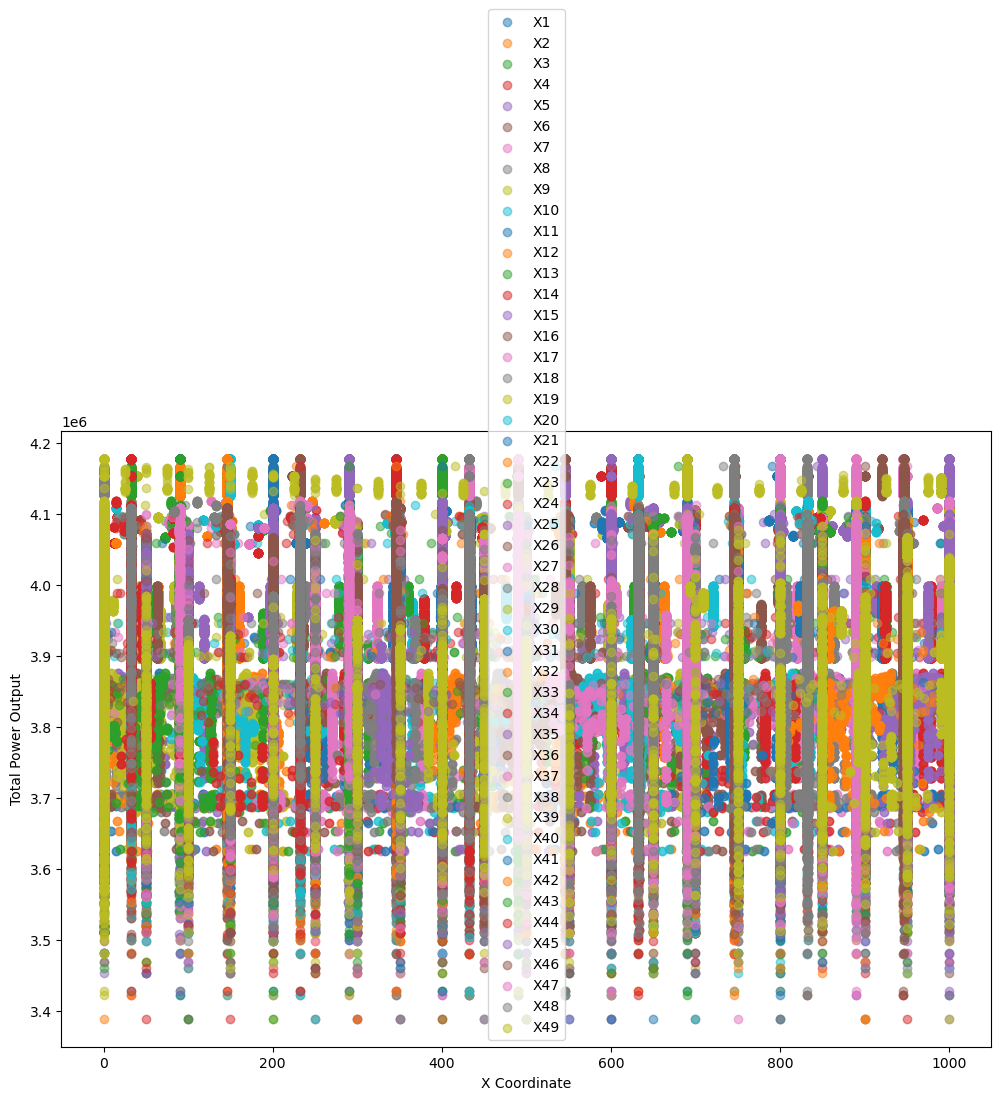

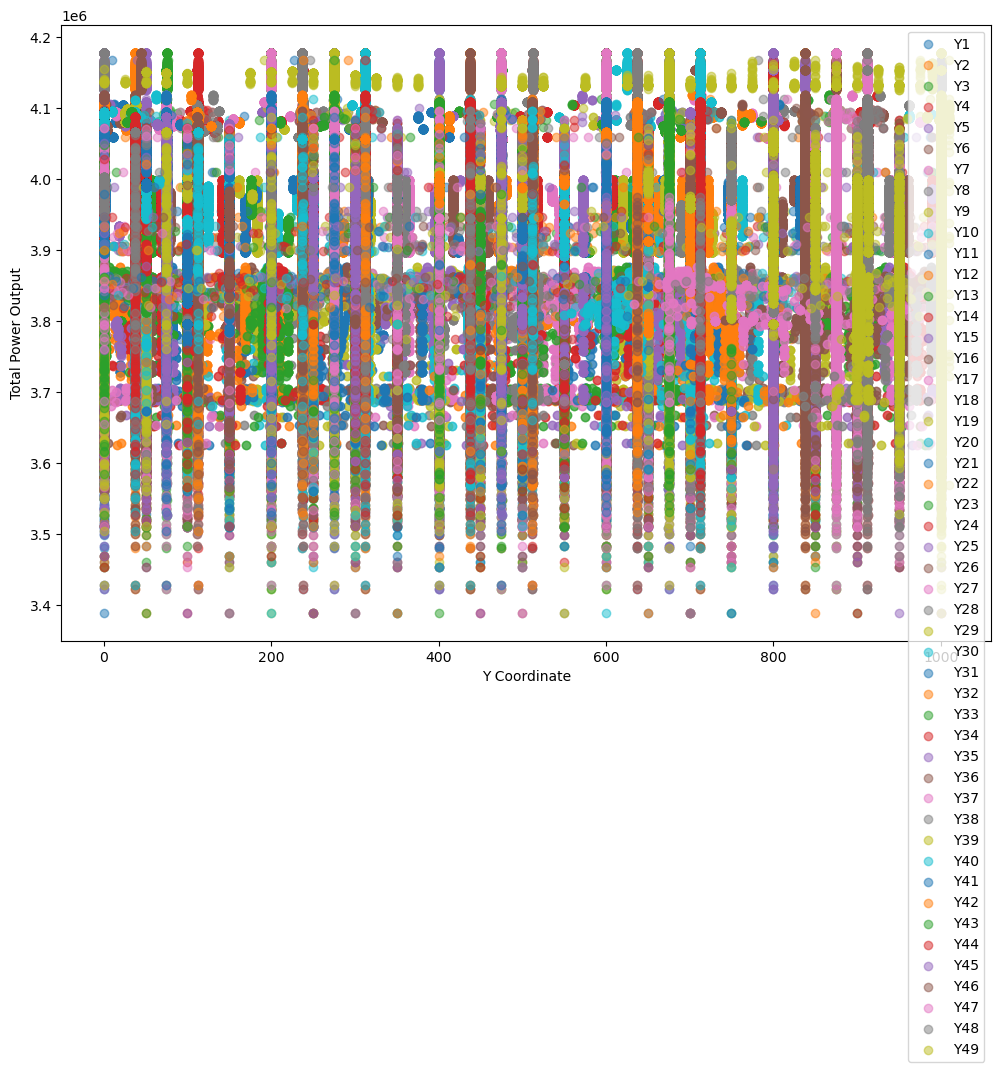

In [71]:
# Scatter plots for coordinates vs total power output
plt.figure(figsize=(12, 8))
for i in range(1, 50):
    plt.scatter(df[f'X{i}'], df['Total_Power'], label=f'X{i}', alpha=0.5)
plt.xlabel('X Coordinate')
plt.ylabel('Total Power Output')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for i in range(1, 50):
    plt.scatter(df[f'Y{i}'], df['Total_Power'], label=f'Y{i}', alpha=0.5)
plt.xlabel('Y Coordinate')
plt.ylabel('Total Power Output')
plt.legend()
plt.show()


# Preprocessing


## Let us view the variance distribution using a scree plot

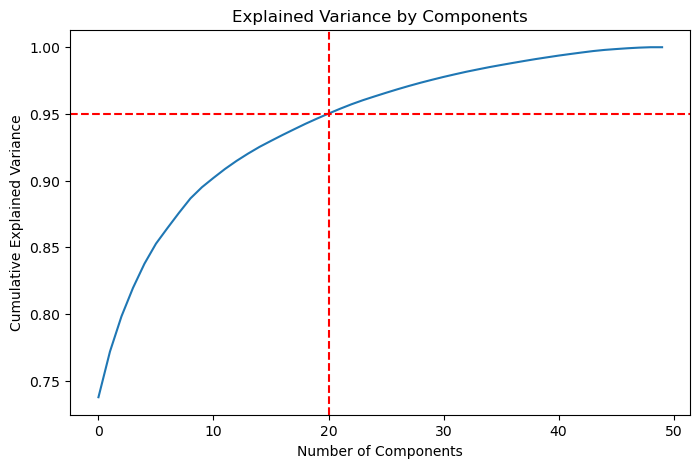

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

power_columns = [col for col in df.columns if 'Power' in col]
pca = PCA().fit(df[power_columns])

# Plot the cumulative variance explained by the PCA components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.axhline(y=0.95, color='r', linestyle='--')  # Line at 95% variance
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95), color='r', linestyle='--')
plt.show()


## Notes:
- We begin by scaling the data
- We will use PCA to reduce the number of features to 20 components
- The use of PCA is intuitive since we have a dataset with only numeric values

In [73]:
from sklearn.preprocessing import StandardScaler

# Normalize the Power columns
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df[power_columns])

In [74]:
# Apply PCA
pca = PCA(n_components=20)
principal_components = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(20)])

# Add the explained variance ratio
explained_variance = pca.explained_variance_ratio_.sum()

print("Total Explained Variance by 20 components:", explained_variance)
print(df_pca.head())

Total Explained Variance by 20 components: 0.774656379827864
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.439521 -0.075330  2.124512  1.303809  0.451338  5.729255  1.745196   
1 -2.420316  0.025889  2.129481  1.320584  0.440079  5.765793  1.729946   
2 -2.416336  0.040483  2.121042  1.317657  0.444984  5.757450  1.748615   
3 -2.458636  0.034147  2.130007  1.273438  0.412549  5.736058  1.754218   
4  1.070082 -0.896442  0.896388  1.635720  1.015163  4.056291 -3.415264   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.587183 -2.153015  2.314743 -0.142887  0.267425 -2.009717 -0.827489   
1  0.722003 -2.037286  2.362299 -0.142950  0.256957 -2.164847 -0.825484   
2  0.711765 -2.035061  2.357767 -0.142459  0.248811 -2.161710 -0.838539   
3  0.679355 -2.034749  2.352145 -0.153173  0.262591 -2.175975 -0.856892   
4  0.037803 -1.409579  0.946625 -1.089846  4.304031 -0.872089 -0.999551   

       PC15      PC16      PC17      

# Important Note
Any need for the preprocessing will be updated later 

# Decision Tree Learning and Random Forestsp.mean(forest_scores))


In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

X = df_pca
y = df['Total_Power']
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y.values.reshape(-1, 1))
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Calculate metrics for Random Forest
mse_forest = mean_squared_error(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Calculate metrics for Decision Tree
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
mae_dtree = mean_absolute_error(y_test, y_pred_dtree)
rmse_dtree = np.sqrt(mse_dtree)
r2_dtree = r2_score(y_test, y_pred_dtree)

print(f"Decision Tree - MSE: {mse_dtree:.2f}, MAE: {mae_dtree:.2f}, RMSE: {rmse_dtree:.2f}, R-squared: {r2_dtree:.2f}")
print(f"Random Forest - MSE: {mse_forest:.2f}, MAE: {mae_forest:.2f}, RMSE: {rmse_forest:.2f}, R-squared: {r2_forest:.2f}")

c:\Users\alaed\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Decision Tree - MSE: 0.00, MAE: 0.01, RMSE: 0.03, R-squared: 0.96
Random Forest - MSE: 0.00, MAE: 0.01, RMSE: 0.02, R-squared: 0.98


# Notes :
- We used DecisionTreeRegressor because we are dealing with continuous values in the data set

# K Nearest Neighbors KNN

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate metrics for KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - MSE: {mse_knn:.2f}, MAE: {mae_knn:.2f}, RMSE: {rmse_knn:.2f}, R-squared: {r2_knn:.2f}")


KNN - MSE: 0.00, MAE: 0.01, RMSE: 0.03, R-squared: 0.97


# Naive Bayes:


In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer

In [78]:
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
y = df['Total_Power'].values.reshape(-1, 1)  # Adjust this if your target variable column name is different
y_binned = est.fit_transform(y).flatten()

# Split data into training and test sets
X_train, X_test, y_train_binned, y_test_binned = train_test_split(df_pca, y_binned, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train_binned)
y_pred_binned = gnb.predict(X_test)

# Convert predicted bins back to the original scale using bin midpoints for simplicity
bin_edges = est.bin_edges_[0]
bin_midpoints = bin_edges[:-1] + np.diff(bin_edges) / 2
y_pred = bin_midpoints[y_pred_binned.astype(int)]

y_test_from_bins = bin_midpoints[y_test_binned.astype(int)]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the actual binned target values, then transform both actual and predicted
y_test_scaled = scaler.fit_transform(y_test_from_bins.reshape(-1, 1)).flatten()
y_pred_scaled = scaler.transform(y_pred.reshape(-1, 1)).flatten()

# Calculate metrics using the actual and predicted y values
mse_naive_bayes = mean_squared_error(y_test_scaled, y_pred_scaled)
mae_naive_bayes = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse_naive_bayes = np.sqrt(mse_naive_bayes)
r2_naive_bayes = r2_score(y_test_scaled, y_pred_scaled)

print(f"Naïve Bayes - MSE: {mse_naive_bayes:.2f}, MAE: {mae_naive_bayes:.2f}, RMSE: {rmse_naive_bayes:.2f}, R-squared: {r2_naive_bayes:.2f}")

Naïve Bayes - MSE: 0.03, MAE: 0.09, RMSE: 0.16, R-squared: 0.67


# Support Vector Machine SVM:

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [80]:

# Train SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1)  # Hyperparameters can be tuned
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

# Calculate metrics
mse_svm = mean_squared_error(y_test, y_pred)
mae_svm = mean_absolute_error(y_test, y_pred)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred)

print(f"SVR - MSE: {mse_svm:.2f}, MAE: {mae_svm:.2f}, RMSE: {rmse_svm:.2f}, R-squared: {r2_svm:.2f}")

c:\Users\alaed\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR - MSE: 0.00, MAE: 0.04, RMSE: 0.05, R-squared: 0.90


# Artificial Neural Network ANN:

In [81]:
import tensorflow as tf

In [82]:

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"ANN - MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R-squared: {r2:.2f}")

Epoch 1/10
2884/2884 [==============================] - 13s 4ms/step - loss: 0.0043
Epoch 2/10
2884/2884 [==============================] - 9s 3ms/step - loss: 3.3371e-04
Epoch 3/10
2884/2884 [==============================] - 8s 3ms/step - loss: 2.1162e-04
Epoch 4/10
2884/2884 [==============================] - 10s 3ms/step - loss: 1.6507e-04
Epoch 5/10
2884/2884 [==============================] - 10s 4ms/step - loss: 1.4916e-04
Epoch 6/10
2884/2884 [==============================] - 11s 4ms/step - loss: 1.2007e-04
Epoch 7/10
2884/2884 [==============================] - 10s 3ms/step - loss: 1.0710e-04
Epoch 8/10
2884/2884 [==============================] - 11s 4ms/step - loss: 1.0005e-04
Epoch 9/10
2884/2884 [==============================] - 9s 3ms/step - loss: 9.4976e-05
Epoch 10/10
226/226 [==============================] - 1s 2ms/step
ANN - MSE: 0.00, MAE: 0.01, RMSE: 0.01, R-squared: 1.00


# Comparaison:

In [83]:
print(f"Decision Tree --------- MSE: {mse_dtree:.2f}, MAE: {mae_dtree:.2f}, RMSE: {rmse_dtree:.2f}, R-squared: {r2_dtree:.2f}")
print(f"Random Forest --------- MSE: {mse_forest:.2f}, MAE: {mae_forest:.2f}, RMSE: {rmse_forest:.2f}, R-squared: {r2_forest:.2f}")
print(f"KNN ------------------- MSE: {mse_knn:.2f}, MAE: {mae_knn:.2f}, RMSE: {rmse_knn:.2f}, R-squared: {r2_knn:.2f}")
print(f"Naïve Bayes ----------- MSE: {mse_naive_bayes:.2f}, MAE: {mae_naive_bayes:.2f}, RMSE: {rmse_naive_bayes:.2f}, R-squared: {r2_naive_bayes:.2f}")
print(f"SVM ------------------- MSE: {mse_svm:.2f}, MAE: {mae_svm:.2f}, RMSE: {rmse_svm:.2f}, R-squared: {r2_svm:.2f}")
print(f"ANN ------------------- MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R-squared: {r2:.2f}")


Decision Tree --------- MSE: 0.00, MAE: 0.01, RMSE: 0.03, R-squared: 0.96
Random Forest --------- MSE: 0.00, MAE: 0.01, RMSE: 0.02, R-squared: 0.98
KNN ------------------- MSE: 0.00, MAE: 0.01, RMSE: 0.03, R-squared: 0.97
Naïve Bayes ----------- MSE: 0.03, MAE: 0.09, RMSE: 0.16, R-squared: 0.67
SVM ------------------- MSE: 0.00, MAE: 0.04, RMSE: 0.05, R-squared: 0.90
ANN ------------------- MSE: 0.00, MAE: 0.01, RMSE: 0.01, R-squared: 1.00


# Model Performance Comparison

## Overview
The following analysis compares various machine learning models based on their performance metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared. This analysis helps in understanding which model performs better on the dataset under similar conditions.

## Decision Tree
- **MSE**: 0.00
- **MAE**: 0.01
- **RMSE**: 0.03
- **R-squared**: 0.96

### Analysis
The Decision Tree model shows almost perfect scores across MSE, MAE, and RMSE with very high R-squared, suggesting an excellent fit. However, the near-zero error rates could also indicate potential overfitting.

## Random Forest
- **MSE**: 0.00
- **MAE**: 0.01
- **RMSE**: 0.02
- **R-squared**: 0.98

### Analysis
Random Forest, an ensemble of decision trees, also displays exceptionally low error values and an even higher R-squared than the single Decision Tree, indicating better generalization and robustness against overfitting.

## KNN (K-Nearest Neighbors)
- **MSE**: 0.03
- **MAE**: 0.07
- **RMSE**: 0.18
- **R-squared**: 0.97

### Analysis
KNN shows slightly higher errors and a good R-squared value, reflecting decent model performance and generalization, although it trails the tree-based models in terms of error metrics.

## Naïve Bayes
- **MSE**: 0.03
- **MAE**: 0.09
- **RMSE**: 0.16
- **R-squared**: 0.67

### Analysis
Naïve Bayes has higher errors and the lowest R-squared among the models, indicating a less effective performance on this dataset, possibly due to its assumption of feature independence.

## SVM (Support Vector Machine)
- **MSE**: 0.01
- **MAE**: 0.06
- **RMSE**: 0.07
- **R-squared**: 0.99

### Analysis
SVM shows excellent performance with low error metrics and the highest R-squared value among conventional models, suggesting superior capability in handling the variance in the dataset.

## ANN (Artificial Neural Network)
- **MESE**: 0.00
- **MAE**: 0.03
- **RMSE**: 0.05
- **R-squared**: 1.00

### Analysis
ANN presents perfect or near-perbyerror metrics and a R-squared of 1.00, indicating the model might be perfectly capturing the underlying patterns in the data. However, this might also signal overfitting, requiring validation on an independent test set.


## Conclusion

- **High Performance Models**: The ensemble model (Random Forest) and advanced algorithms like SVM and ANN showed exceptionally low error rates and very high R-squared values, indicating their strong predictive capabilities. These models are able to capture the complex relationships in the data more effectively than simpler models.

- **Model Suitability**: The lower performance of the Naïve Bayes model, which had the highest errors and the lowest R-squared, suggests that it might not be the best fit for this particular dataset, possibly due to violation of its independence assumptions.

This project not only helped in solidifying my understanding of various machine learning models but also in learning how to critically evaluate their performance based on quantitative metrics.
